<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/decision_tree_regression_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Underfitting Model:
Mean Squared Error: 4606.587005302991
R2 Score: 0.13052943291162566


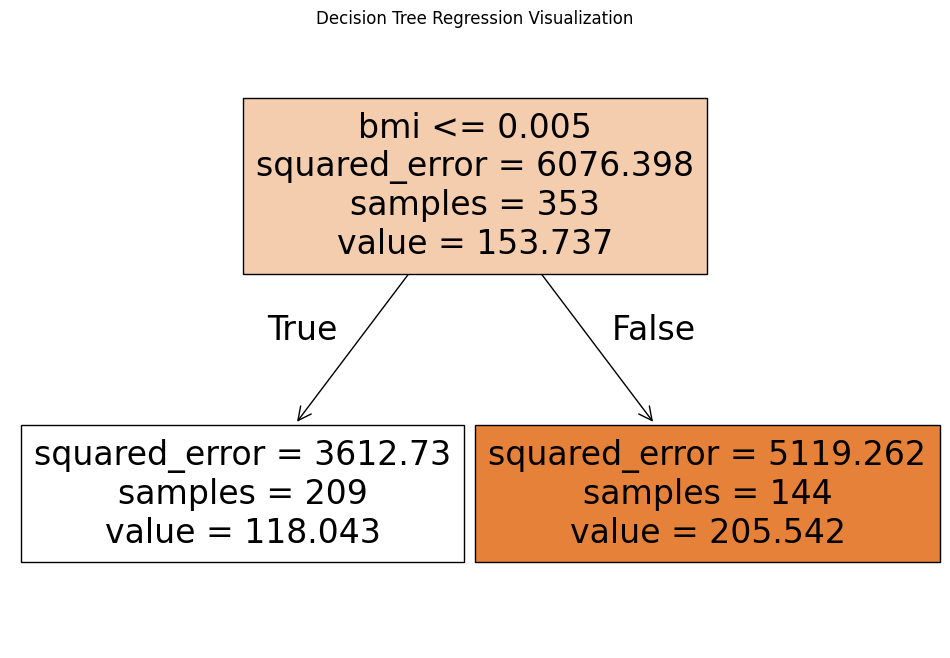

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class DecisionTreeRegression:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.model = DecisionTreeRegressor(
            criterion="squared_error",
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
        print("R2 Score:", r2_score(y_test, y_pred))

    def plot_tree(self, feature_names):
        plt.figure(figsize=(12, 8))
        plot_tree(self.model, feature_names=feature_names, filled=True)
        plt.title('Decision Tree Regression Visualization')
        plt.show()

# Underfitting Model
underfitting_model = DecisionTreeRegression(max_depth=1)
underfitting_model.train(X_train, y_train)
print("Underfitting Model:")
underfitting_model.evaluate(X_test, y_test)
underfitting_model.plot_tree(X.columns)

Overfitting Model:
Mean Squared Error: 4976.797752808989
R2 Score: 0.060653981041140725


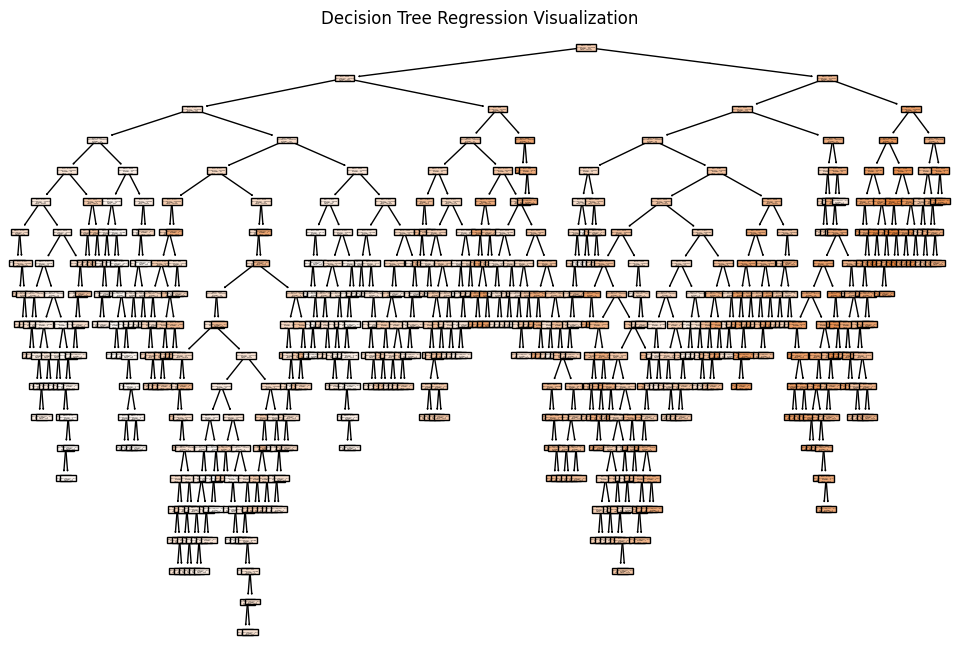

In [2]:
# Overfitting Model
overfitting_model = DecisionTreeRegression(max_depth=None, min_samples_split=2, min_samples_leaf=1)
overfitting_model.train(X_train, y_train)
print("Overfitting Model:")
overfitting_model.evaluate(X_test, y_test)
overfitting_model.plot_tree(X.columns)

Optimal Model:
Mean Squared Error: 2972.5166106866523
R2 Score: 0.4389521569443703


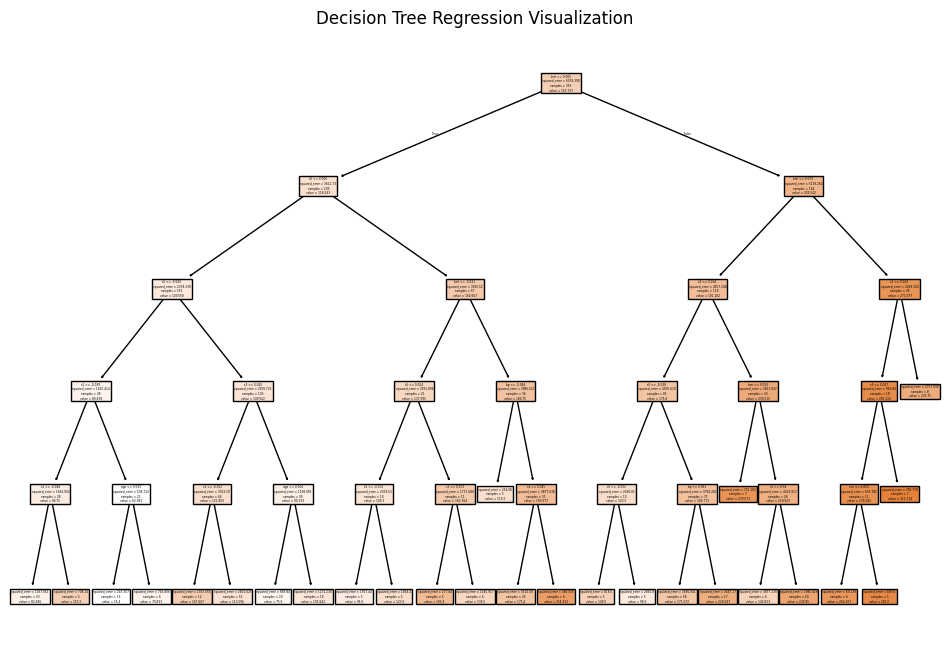

In [3]:
# Optimal Model
optimal_model = DecisionTreeRegression(max_depth=5, min_samples_split=10, min_samples_leaf=5)
optimal_model.train(X_train, y_train)
print("Optimal Model:")
optimal_model.evaluate(X_test, y_test)
optimal_model.plot_tree(X.columns)

In [4]:
# Cross-validation
models = {'Underfitting': underfitting_model, 'Overfitting': overfitting_model, 'Optimal': optimal_model}
for name, model in models.items():
    scores = cross_val_score(model.model, X, y, cv=5, scoring='r2')
    print(f"{name} Model - Cross Validation R2 Score: {np.mean(scores):.4f}")

Underfitting Model - Cross Validation R2 Score: 0.1733
Overfitting Model - Cross Validation R2 Score: -0.1446
Optimal Model - Cross Validation R2 Score: 0.2719
